# UAS PROYEK SAINS DATA

> <br> Nama: Muhammad Muqtafin Nuha <br> NIM : 210411100218 <br><br>

<P> Informasi Data:

> <br> - Data Hipertensi berasal dari Puskesmas Modopuro, Kec. Mojosari, Kabupaten Mojokerto, Jawa Timur <br> - Data sebanyak 1734 record dari Bulan Maret - Agustus 2022 <br> - Data ini berisi 79 atribut yaitu: No, Tanggal,	Nama Pasien, No. eRM, NIK, No. RM Lama, No. Dokumen, Jenis Kelamin, No Telp, Alamat, RT, RW, Pekerjaan, Tanggal Pemeriksaan, Kelurahan, Tempat Lahir, Tgl. Lahir, Umur (Tahun), Umur (Bulan), Umur (Hari), Nama Ayah, Nama Ibu, Jenis Kunjungan, Poli/Ruangan, Asuransi, No. Asuransi, Kelainan, Dokter / Tenaga Medis, Perawat / Bidan / Nutrisionist / Sanitarian, SOAP Assessment, SOAP Subjective, SOAP Objective, SOAP Planning, Keluhan Utama, Keluhan Tambahan, Lama Sakit (Hari), Merokok, Konsumsi Alkohol, Kurang Sayur/Buah, Terapi, Edukasi, Tindakan Keperawatan, Keterangan, RPS, RPD, RPK, Alergi, Kesadaran, Triage, Tinggi (Cm), Berat Badan (Kg), Lingkar Perut (Cm), IMT, Hasil IMT, Sistole (mm), Diastole (Hg), Nafas (Menit), Detak Nadi (Menit), Detak Jantung, Suhu (C), Aktifitas Fisik, Diagnosa 1, Jenis Kasus 1, Diagnosa 2, Jenis Kasus 2, Diagnosa 3, Jenis Kasus 3, Diagnosa 4, Jenis Kasus 4, Diagnosa 5, Jenis Kasus 5, Tindakan, Resep, Apoteker, Pendaftaran/Rujukan Internal, Lama Antrean (Menit), Lama Pemeriksaan (Menit), Lama Pelayanan Obat (Menit), Petugas Pendaftaran <br> <br>
</p>

---

In [134]:
import pandas as pd
import numpy as np
import re

## Preparation Data

### Data Awal

In [135]:
df = pd.read_excel('DatasetHipertensi.xlsx')
df.head()

,No,Tanggal,Nama Pasien,No. eRM,NIK,No. RM Lama,No. Dokumen,Jenis Kelamin,No Telp,Alamat,...,Diagnosa 5,Jenis Kasus 5,Tindakan,Resep,Apoteker,Pendaftaran/Rujukan Internal,Lama Antrean (Menit),Lama Pemeriksaan (Menit),Lama Pelayanan Obat (Menit),Petugas Pendaftaran
0,1,2022-03-01 00:00:00,SANIYAH,505612,NaN,NaN,NaN,P,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,Pendaftaran,0 hari 20 jam 1 menit,0 hari 0 jam 24 menit,0 hari 0 jam 0 menit,puskesmas.modopuro
1,2,2022-03-01 00:00:00,ROFIAH,355585,3.516085e+15,NaN,001750,P,8.523473e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,Pendaftaran,0 hari 20 jam 2 menit,0 hari 0 jam 26 menit,0 hari 0 jam 0 menit,puskesmas.modopuro
2,3,2022-03-01 00:00:00,PITIYAH,400510,NaN,NaN,NaN,P,8.523473e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,Pendaftaran,0 hari 20 jam 5 menit,0 hari 0 jam 44 menit,0 hari 0 jam 0 menit,puskesmas.modopuro
3,4,2022-03-01 00:00:00,UMIYAH,365235,NaN,NaN,NaN,P,8.523473e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,Pendaftaran,0 hari 20 jam 7 menit,0 hari 0 jam 52 menit,0 hari 0 jam 0 menit,puskesmas.modopuro
4,5,2022-03-01 08:19:57,SRI PUJOWATI,13938,3.516086e+15,P351608018003129,001028,P,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,Pendaftaran,0 hari 1 jam 8 menit,0 hari 0 jam 0 menit,0 hari 0 jam 0 menit,puskesmas.modopuro


## Seleksi Fitur

In [136]:
df = df.loc[df['Diagnosa 1'].isin(['Essential (primary) hypertension (I10)', 'Hypertensive heart disease (I11)'])]

X = df[['Jenis Kelamin', 'Umur (Tahun)', 'Merokok', 'Konsumsi Alkohol', 'Kurang Sayur/Buah', 'Tinggi (Cm)', 'Berat Badan (Kg)', 'IMT', 'Hasil IMT', 'Sistole (mm)', 'Diastole (Hg)', 'Nafas (Menit)', 'Detak Nadi (Menit)']]
y = df[['Diagnosa 1']]

### Data Fitur

In [137]:
X.head()

,Jenis Kelamin,Umur (Tahun),Merokok,Konsumsi Alkohol,Kurang Sayur/Buah,Tinggi (Cm),Berat Badan (Kg),IMT,Hasil IMT,Sistole (mm),Diastole (Hg),Nafas (Menit),Detak Nadi (Menit)
0,P,63 Tahun,Tidak,Tidak,Tidak,147 cm,43 kg,19.90,IDEAL,180 mm,80 Hg,18 /menit,88 /menit
1,P,55 Tahun,Tidak,Tidak,Tidak,145 cm,45 kg,21.40,IDEAL,170 mm,80 Hg,18 /menit,88 /menit
2,P,70 Tahun,Tidak,Tidak,Tidak,146 cm,45 kg,21.11,IDEAL,170 mm,80 Hg,18 /menit,88 /menit
3,P,66 Tahun,Tidak,Tidak,Tidak,165 cm,55 kg,20.20,IDEAL,180 mm,80 Hg,18 /menit,88 /menit
4,P,65 Tahun,Tidak,Tidak,Tidak,158 cm,56 kg,22.43,IDEAL,130 mm,80 Hg,18 /menit,80 /menit


### Data Target

In [138]:
y.head()

,Diagnosa 1
0,Essential (primary) hypertension (I10)
1,Essential (primary) hypertension (I10)
2,Essential (primary) hypertension (I10)
3,Essential (primary) hypertension (I10)
4,Hypertensive heart disease (I11)


In [139]:
y['Diagnosa 1'].nunique()


2

In [140]:
y['Diagnosa 1'].value_counts()

Diagnosa 1
Essential (primary) hypertension (I10)    1429
Hypertensive heart disease (I11)            97
Name: count, dtype: int64

## Transformation Data

In [141]:
pd.options.mode.chained_assignment = None

X['Jenis Kelamin'] = X['Jenis Kelamin'].replace({'P': 0, 'L': 1})
X['Umur (Tahun)'] = X['Umur (Tahun)'].str.replace('Tahun', '')
X['Merokok'] = X['Merokok'].replace({'Tidak': 0, 'Ya': 1})
X['Konsumsi Alkohol'] = X['Konsumsi Alkohol'].replace({'Tidak': 0, 'Ya': 1})
X['Kurang Sayur/Buah'] = X['Kurang Sayur/Buah'].replace({'Tidak': 0, 'Ya': 1})
X['Tinggi (Cm)'] = X['Tinggi (Cm)'].str.replace('cm', '')
X['Berat Badan (Kg)'] = X['Berat Badan (Kg)'].str.replace('kg', '')
X['Sistole (mm)'] = X['Sistole (mm)'].str.replace('mm', '')
X['Diastole (Hg)'] = X['Diastole (Hg)'].str.replace('Hg', '')
X['Nafas (Menit)'] = X['Nafas (Menit)'].str.replace('/menit', '')
X['Detak Nadi (Menit)'] = X['Detak Nadi (Menit)'].str.replace('/menit', '')
X['Hasil IMT'] = X['Hasil IMT'].replace({'KURANG': 1, 'IDEAL': 2, 'LEBIH': 3, 'GEMUK': 4, 'SANGAT GEMUK': 5})
y['Diagnosa 1'] = y['Diagnosa 1'].replace({'Essential (primary) hypertension (I10)': 0, 'Hypertensive heart disease (I11)': 1})

display(X.head())
display(y.head())

,Jenis Kelamin,Umur (Tahun),Merokok,Konsumsi Alkohol,Kurang Sayur/Buah,Tinggi (Cm),Berat Badan (Kg),IMT,Hasil IMT,Sistole (mm),Diastole (Hg),Nafas (Menit),Detak Nadi (Menit)
0,0,63,0,0,0,147,43,19.90,2.0,180,80,18,88
1,0,55,0,0,0,145,45,21.40,2.0,170,80,18,88
2,0,70,0,0,0,146,45,21.11,2.0,170,80,18,88
3,0,66,0,0,0,165,55,20.20,2.0,180,80,18,88
4,0,65,0,0,0,158,56,22.43,2.0,130,80,18,80


,Diagnosa 1
0,0
1,0
2,0
3,0
4,1


## Preprocessing Data

### Informasi Data

In [145]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 0 to 1730
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jenis Kelamin       1526 non-null   int64  
 1   Umur (Tahun)        1526 non-null   object 
 2   Merokok             1526 non-null   int64  
 3   Konsumsi Alkohol    1526 non-null   int64  
 4   Kurang Sayur/Buah   1526 non-null   int64  
 5   Tinggi (Cm)         1526 non-null   object 
 6   Berat Badan (Kg)    1526 non-null   object 
 7   IMT                 1525 non-null   float64
 8   Hasil IMT           1525 non-null   float64
 9   Sistole (mm)        1526 non-null   object 
 10  Diastole (Hg)       1526 non-null   object 
 11  Nafas (Menit)       1526 non-null   object 
 12  Detak Nadi (Menit)  1526 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 166.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 0 to 1730
Data columns (total 1 columns)

### Ubah Tipe Data

In [146]:
X['Umur (Tahun)'] = X['Umur (Tahun)'].astype('int64')
X['Tinggi (Cm)'] = X['Tinggi (Cm)'].astype('int64')
X['Berat Badan (Kg)'] = X['Berat Badan (Kg)'].astype('float64')
X['Sistole (mm)'] = X['Sistole (mm)'].astype('int64')
X['Diastole (Hg)'] = X['Diastole (Hg)'].astype('int64')
X['Nafas (Menit)'] = X['Nafas (Menit)'].astype('int64')
X['Detak Nadi (Menit)'] = X['Detak Nadi (Menit)'].astype('int64')

### Cek Data Kosong / Missing Value

In [148]:
print(X.isnull().sum())
print(y.isnull().sum())

Jenis Kelamin         0
Umur (Tahun)          0
Merokok               0
Konsumsi Alkohol      0
Kurang Sayur/Buah     0
Tinggi (Cm)           0
Berat Badan (Kg)      0
IMT                   1
Hasil IMT             1
Sistole (mm)          0
Diastole (Hg)         0
Nafas (Menit)         0
Detak Nadi (Menit)    0
dtype: int64
Diagnosa 1    0
dtype: int64


### Perbaikan Data Missing Value

In [149]:
X['IMT'].fillna(X['IMT'].mean(), inplace=True)
X['Hasil IMT'].fillna(X['Hasil IMT'].mean(), inplace=True)

In [150]:
print(X.isnull().sum())
print(y.isnull().sum())

Jenis Kelamin         0
Umur (Tahun)          0
Merokok               0
Konsumsi Alkohol      0
Kurang Sayur/Buah     0
Tinggi (Cm)           0
Berat Badan (Kg)      0
IMT                   0
Hasil IMT             0
Sistole (mm)          0
Diastole (Hg)         0
Nafas (Menit)         0
Detak Nadi (Menit)    0
dtype: int64
Diagnosa 1    0
dtype: int64


### Hasil Cleaning Data

In [181]:
cleaned_data = pd.concat([X, y], axis=1)
cleaned_data.to_excel('cleaned_data.xlsx', index=False)

cleaned_data.head()

,Jenis Kelamin,Umur (Tahun),Merokok,Konsumsi Alkohol,Kurang Sayur/Buah,Tinggi (Cm),Berat Badan (Kg),IMT,Hasil IMT,Sistole (mm),Diastole (Hg),Nafas (Menit),Detak Nadi (Menit),Diagnosa 1
0,0,63,0,0,0,147,43.0,19.90,2.0,180,80,18,88,0
1,0,55,0,0,0,145,45.0,21.40,2.0,170,80,18,88,0
2,0,70,0,0,0,146,45.0,21.11,2.0,170,80,18,88,0
3,0,66,0,0,0,165,55.0,20.20,2.0,180,80,18,88,0
4,0,65,0,0,0,158,56.0,22.43,2.0,130,80,18,80,1


### Normalisasi Data

In [185]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized.head()

,Jenis Kelamin,Umur (Tahun),Merokok,Konsumsi Alkohol,Kurang Sayur/Buah,Tinggi (Cm),Berat Badan (Kg),IMT,Hasil IMT,Sistole (mm),Diastole (Hg),Nafas (Menit),Detak Nadi (Menit)
0,0.0,0.681818,0.0,0.0,0.0,0.733871,0.298507,0.040805,0.25,0.670103,0.333333,0.288136,0.871795
1,0.0,0.590909,0.0,0.0,0.0,0.717742,0.328358,0.049873,0.25,0.618557,0.333333,0.288136,0.871795
2,0.0,0.761364,0.0,0.0,0.0,0.725806,0.328358,0.048120,0.25,0.618557,0.333333,0.288136,0.871795
3,0.0,0.715909,0.0,0.0,0.0,0.879032,0.477612,0.042619,0.25,0.670103,0.333333,0.288136,0.871795
4,0.0,0.704545,0.0,0.0,0.0,0.822581,0.492537,0.056100,0.25,0.412371,0.333333,0.288136,0.769231


### Correlation Data

<Axes: >

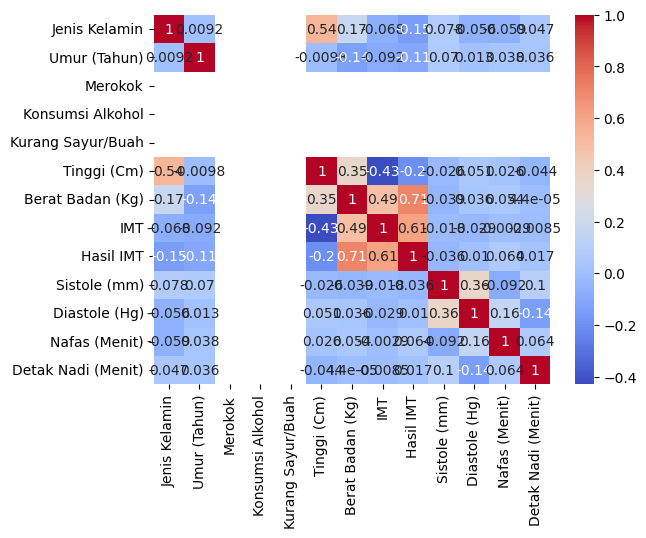

In [188]:
import seaborn as sns

corr = X.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')


## Model Machine Learning

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9379084967320261


/Users/iamapinn/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
